In [1]:
#4th trial
#Preprocess the weather data more
#Drop less useful columns to simplify the data
#Reinstate columns like weather code 
#PCA done in latter stages to be more accurate

In [2]:
import pandas as pd
import numpy as np
weather = pd.read_csv('../assets/weather_2.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Pre-processing weather data

In [4]:
pd.options.display.max_columns = None
weather.head(2)

,Date,Year,Month,Day,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007-05-01,2007,5,1,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,0 days 04:48:00.000000000,0 days 18:49:00.000000000,0.0,29.14,29.820,2.20,26.0,9.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-02,2007,5,2,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,0 days 04:47:00.000000000,0 days 18:50:00.000000000,0.0,29.41,30.085,13.15,3.0,13.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
weather.columns

Index(['Date', 'Year', 'Month', 'Day', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'BR', 'HZ', 'RA', 'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG',
       'FG+', 'MIFG', 'SQ', 'SN', 'VCFG', 'GR'],
      dtype='object')

In [6]:
weather['Sunrise'] = pd.to_timedelta(weather['Sunrise'])
weather['Sunset'] = pd.to_timedelta(weather['Sunset'])

In [7]:
#Feature engineering: Daylight 
weather['Daylight'] = weather['Sunset'] - weather['Sunrise']

In [8]:
weather = weather.drop(['Sunset','Sunrise'],axis=1)

In [9]:
#changing Daylight back to float, numbers are in mintues!
weather['Daylight'] = weather['Daylight'].astype('timedelta64[m]')

In [10]:
weather.columns

Index(['Date', 'Year', 'Month', 'Day', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'BR', 'HZ', 'RA',
       'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG', 'FG+', 'MIFG', 'SQ', 'SN',
       'VCFG', 'GR', 'Daylight'],
      dtype='object')

In [11]:
#This is to prepare the data to be merged with train/test data

weather_2 = weather.groupby(['Year','Month']).agg({'Tmax':'mean',
                                                   'Tmin':'mean', 
                                                   'Tavg':'mean', 
                                                   'Depart':'mean', 
                                                   'DewPoint':'mean',
                                                   'WetBulb':'mean',
                                                   'Heat': 'mean',
                                                   'Cool':'mean',
                                                   'PrecipTotal':'mean',
                                                   'StnPressure':'mean',
                                                   'SeaLevel':'mean',
                                                   'ResultSpeed':'mean',
                                                   'ResultDir':'mean',
                                                   'AvgSpeed':'mean',
                                                   'Daylight':'mean',
                                                   'BR':'max', 
                                                   'HZ':'max', 
                                                   'RA':'max',
                                                   'TSRA':'max',
                                                   'VCTS':'max',
                                                   'FU':'max',
                                                   'TS':'max',
                                                   'DZ':'max',
                                                   'BCFG':'max',
                                                   'FG+':'max',
                                                   'MIFG':'max',
                                                   'SQ':'max',
                                                   'SN':'max',
                                                   'VCFG':'max',
                                                   'GR':'max'})


weather_2

Tmax       Tmin       Tavg    Depart   DewPoint    WetBulb  \
Year Month                                                                    
2007 5      75.758065  53.032258  64.612903  5.258065  45.790323  54.580645   
     6      81.433333  62.516667  72.200000  3.333333  56.600000  62.983333   
     7      83.177419  64.709677  74.193548  0.677419  58.838710  64.758065   
     8      83.048387  67.145161  75.387097  3.322581  64.096774  68.161290   
     9      79.200000  58.316667  68.916667  4.433333  53.050000  59.900000   
     10     68.387097  50.822581  59.838710  7.129032  47.080645  53.177419   
2008 5      66.129032  45.935484  56.322581 -2.935484  42.306452  49.741935   
     6      81.016667  61.700000  71.616667  2.866667  57.333333  63.000000   
     7      84.112903  64.693548  74.612903  0.935484  60.774194  66.096774   
     8      81.774194  64.322581  73.306452  1.193548  59.419355  64.725806   
     9      75.383333  58.166667  67.000000  2.500000  56.250000  60.600000   
     10     61.870968  44.693548  53.500000  0.709677  40.580645  47.322581   
2009 5      70.677419  50.419355  60.758065  1.322581  44.129032  52.193548   
     6      77.183333  59.283333  68.516667 -0.366667  55.400000  60.533333   
     7      78.629032  61.725806  70.403226 -3.774194  56.129032  62.032258   
     8      79.225806  62.677419  71.225806 -1.064516  58.806452  63.596774   
     9      74.066667  57.366667  65.983333  1.766667  55.616667  59.883333   
     10     55.483871  42.951613  49.483871 -3.032258  41.580645  45.645161   
2010 5      71.193548  53.161290  62.419355  3.193548  48.596774  54.854839   
     6      80.216667  62.800000  71.800000  3.233333  60.350000  64.650000   
     7      87.080645  69.080645  78.354839  4.612903  64.016129  69.064516   
     8      85.451613  68.322581  77.112903  5.225806  63.564516  68.403226   
     9      74.383333  56.816667  65.833333  1.566667  52.100000  58.033333   
     10     66.790323  45.870968  56.612903  4.129032  40.177419  48.483871   
2011 5      68.354839  49.193548  59.016129 -0.645161  47.967742  53.112903   
     6      79.516667  60.733333  70.366667  1.400000  57.483333  62.666667   
     7      88.967742  70.596774  80.064516  6.000000  64.548387  70.048387   
     8      82.612903  65.338710  74.258065  2.000000  61.967742  66.516129   
     9      70.216667  55.466667  63.050000 -1.400000  52.266667  56.983333   
     10     64.887097  45.467742  55.370968  2.967742  42.177419  48.661290   
2012 5      75.935484  55.354839  65.887097  7.064516  47.403226  55.983871   
     6      84.816667  63.300000  74.316667  6.000000  53.733333  62.433333   
     7      91.564516  71.790323  82.000000  8.000000  64.274194  70.306452   
     8      84.209677  64.500000  74.580645  1.741935  58.225806  64.580645   
     9      74.783333  55.233333  65.316667  0.600000  50.616667  57.083333   
     10     60.887097  43.693548  52.500000 -0.419355  40.580645  46.983871   
2013 5      71.741935  51.645161  62.000000  2.483871  47.709677  54.419355   
     6      78.333333  59.800000  69.300000  0.533333  56.466667  61.550000   
     7      82.225806  65.612903  74.129032  0.032258  61.112903  66.032258   
     8      82.887097  64.403226  73.919355  1.483871  59.887097  64.548387   
     9      77.716667  58.500000  68.400000  3.666667  54.816667  60.333333   
     10     62.822581  45.129032  54.209677  1.258065  44.016129  49.177419   
2014 5      72.193548  51.564516  62.145161  1.903226  46.596774  53.693548   
     6      81.600000  62.350000  72.250000  2.966667  58.050000  63.633333   
     7      80.354839  62.370968  71.645161 -2.709677  56.677419  62.790323   
     8      82.532258  66.290323  74.629032  2.193548  62.274194  66.709677   
     9      74.416667  55.616667  65.250000  0.333333  53.083333  58.166667   
     10     61.548387  45.161290  53.661290  0.193548  42.354839  48.258065   

                 Heat       Cool  PrecipTotal  StnPressure   SeaLe

In [12]:
weather_2 = weather_2.reset_index()

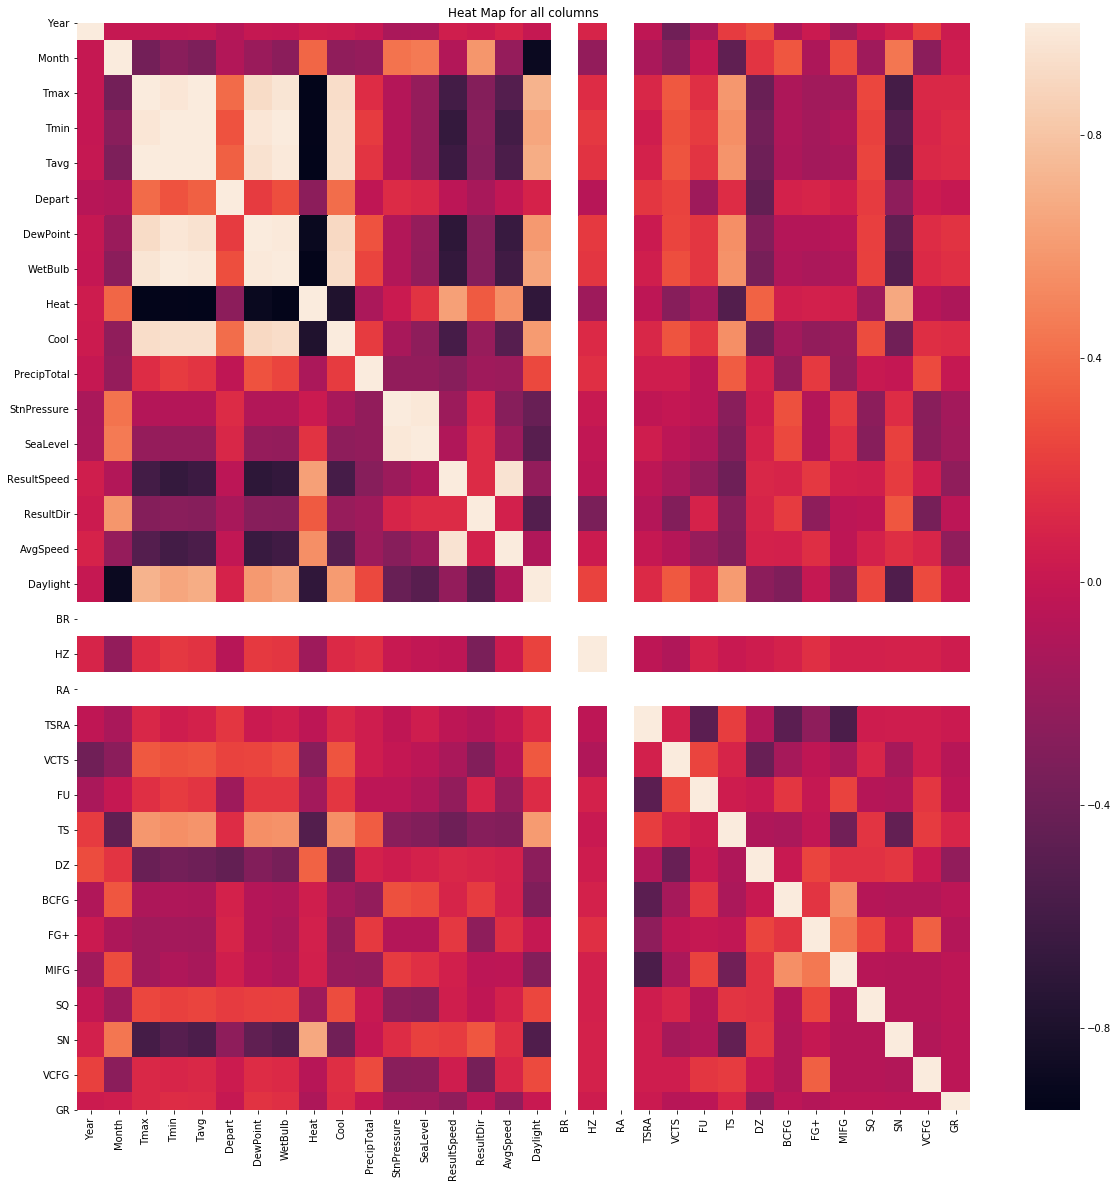

In [13]:
#to find out the general correlation between variables first
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(weather_2.corr(), ax = ax, annot=False, annot_kws={"size": 10})

#Since there are quite a number of correlated variables
#Will try to combine them via PCA

In [14]:
weather_2.head(2)

,Year,Month,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007,5,75.758065,53.032258,64.612903,5.258065,45.790323,54.580645,3.483871,3.096774,0.058387,29.390484,30.079194,8.56129,14.612903,10.158065,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,2007,6,81.433333,62.516667,72.200000,3.333333,56.600000,62.983333,0.533333,7.733333,0.087333,29.268577,29.935740,7.13000,14.800000,8.568333,910.333333,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


### Re-doing the preprocessing for train/test data as well to fit this weather data

In [15]:
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')

In [16]:
test = test.drop(['Id'], axis=1)

In [17]:
print(train.shape)
print(test.shape)

(10506, 12)
(116293, 10)


In [18]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [19]:
combined = pd.merge(train,test,how='outer')

In [20]:
combined.shape

(126799, 12)

In [21]:
#changing Date to type - date
combined['Date'] = pd.to_datetime(combined['Date'])

In [22]:
combined = combined.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'],axis=1)

In [23]:
combined.head(2)

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1.0,0.0
1,2007-05-29,CULEX RESTUANS,T002,41.95469,-87.800991,1.0,0.0


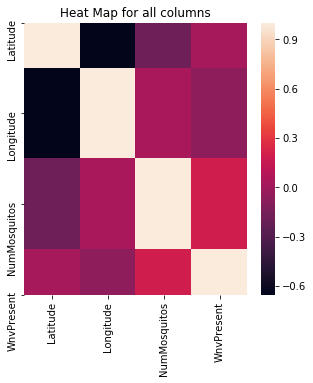

In [24]:
#to find out the general correlation between variables first
fig, ax = plt.subplots(figsize=(5,5)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(combined.corr(), ax = ax, annot=False, annot_kws={"size": 5})

#Not much correlation except for Lat/Long

In [25]:
#change Species into dummy variables
column = ['Species']

combined = pd.get_dummies(data = combined, prefix=column, columns = column, drop_first=True)

In [26]:
combined['Date'] = pd.to_datetime(combined['Date'])
combined['Year'] = combined['Date'].dt.year
combined['Month'] = combined['Date'].dt.month
combined.head(2)


,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,2007,5
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,2007,5


In [27]:
combined.shape

(126799, 15)

In [28]:
weather_2.head(2)

,Year,Month,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007,5,75.758065,53.032258,64.612903,5.258065,45.790323,54.580645,3.483871,3.096774,0.058387,29.390484,30.079194,8.56129,14.612903,10.158065,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,2007,6,81.433333,62.516667,72.200000,3.333333,56.600000,62.983333,0.533333,7.733333,0.087333,29.268577,29.935740,7.13000,14.800000,8.568333,910.333333,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [29]:
full = pd.merge(combined,weather_2, on=['Year','Month'])

In [30]:
full.shape

(126799, 45)

In [31]:
full.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,2007,5,75.758065,53.032258,64.612903,5.258065,45.790323,54.580645,3.483871,3.096774,0.058387,29.390484,30.079194,8.56129,14.612903,10.158065,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,2007,5,75.758065,53.032258,64.612903,5.258065,45.790323,54.580645,3.483871,3.096774,0.058387,29.390484,30.079194,8.56129,14.612903,10.158065,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [32]:
#1st PCA using these 8 columns
COLUMNS = ['Tmax', 'Tmin', 'Tavg', 'Depart','DewPoint', 'WetBulb', 'Heat', 'Cool',]

X = full[COLUMNS]

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(Xn)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pc1_ev = pca.components_[0]
pc2_ev = pca.components_[1]
# Quick way of viewing, rather than looping through each feature
pd.Series(pc1_ev, index=COLUMNS)

Tmax       -0.377557
Tmin       -0.383749
Tavg       -0.383607
Depart     -0.217208
DewPoint   -0.363748
WetBulb    -0.381020
Heat        0.319634
Cool       -0.369051
dtype: float64

In [36]:
full_pca = pca.transform(Xn)
full_pca = pd.DataFrame(full_pca, 
                       columns=['PC'+str(i+1) for i in range(len(COLUMNS))],
                       index=full.index)
full_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.283993,2.128263,-0.900581,0.94781,-0.129749,-0.044943,0.006912,-6.794565e-14
1,4.283993,2.128263,-0.900581,0.94781,-0.129749,-0.044943,0.006912,-6.794565e-14
2,4.283993,2.128263,-0.900581,0.94781,-0.129749,-0.044943,0.006912,-6.794565e-14
3,4.283993,2.128263,-0.900581,0.94781,-0.129749,-0.044943,0.006912,-6.794565e-14
4,4.283993,2.128263,-0.900581,0.94781,-0.129749,-0.044943,0.006912,-6.794565e-14


In [37]:
exp_var = pca.explained_variance_ratio_
exp_var

array([8.39874409e-01, 1.10140322e-01, 2.78371009e-02, 2.08984043e-02,
       1.17539770e-03, 6.97797892e-05, 4.58653723e-06, 1.14227940e-28])

Text(0, 0.5, 'cumulative % of explained variance')

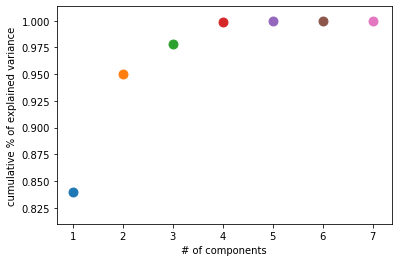

In [38]:
for i in range(1,len(pca.explained_variance_ratio_)):
    plt.scatter(i, sum(pca.explained_variance_ratio_[:i]), s=80)
plt.xlabel("# of components")
plt.ylabel('cumulative % of explained variance')

#The first two PC, PC1 and PC2 amounts to more than 95% of the information stored

In [39]:
pd.DataFrame({'PC1': pc1_ev, 'PC2': pc2_ev},
             index=COLUMNS)

,PC1,PC2
Tmax,-0.377557,0.019539
Tmin,-0.383749,-0.047731
Tavg,-0.383607,-0.011545
Depart,-0.217208,0.846712
DewPoint,-0.363748,-0.147878
WetBulb,-0.381020,-0.095767
Heat,0.319634,0.462346
Cool,-0.369051,0.188368


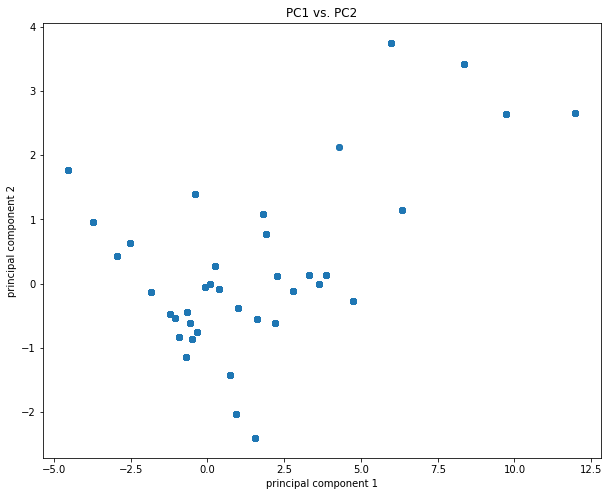

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(full_pca.PC1.values, full_pca.PC2.values, alpha=0.1)

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [41]:
#2st PCA using these 5 columns
COLUMNS2 = ['PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir','AvgSpeed']

X2 = full[COLUMNS2]

In [42]:
ss = StandardScaler()
X2n = ss.fit_transform(X2)

pca2 = PCA()
pca2.fit(X2n)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pc1_ev_2 = pca2.components_[0]
pc2_ev_2 = pca2.components_[1]
pc3_ev_2 = pca2.components_[2]
# Quick way of viewing, rather than looping through each feature
pd.Series(pc1_ev_2, index=COLUMNS2)

PrecipTotal    0.258271
StnPressure    0.471904
SeaLevel       0.453065
ResultSpeed   -0.486141
ResultDir     -0.095165
AvgSpeed      -0.509848
dtype: float64

In [44]:
full_pca2 = pca2.transform(X2n)
full_pca2 = pd.DataFrame(full_pca2, 
                       columns=['PC'+str(i+1) for i in range(len(COLUMNS2))],
                       index=full.index)
full_pca2.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.331821,-3.157468,2.800266,3.168115,-0.087071,0.127773
1,-0.331821,-3.157468,2.800266,3.168115,-0.087071,0.127773
2,-0.331821,-3.157468,2.800266,3.168115,-0.087071,0.127773
3,-0.331821,-3.157468,2.800266,3.168115,-0.087071,0.127773
4,-0.331821,-3.157468,2.800266,3.168115,-0.087071,0.127773


In [45]:
exp_var2 = pca2.explained_variance_ratio_
exp_var2

array([0.49232897, 0.23714523, 0.16273802, 0.09960968, 0.0070418 ,
       0.0011363 ])

Text(0, 0.5, 'cumulative % of explained variance')

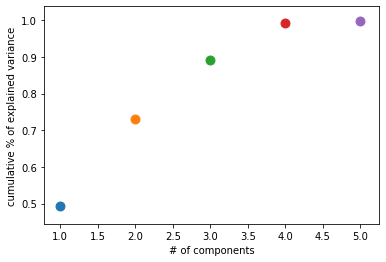

In [46]:
for i in range(1,len(pca2.explained_variance_ratio_)):
    plt.scatter(i, sum(pca2.explained_variance_ratio_[:i]), s=80)
plt.xlabel("# of components")
plt.ylabel('cumulative % of explained variance')

#The first 3 PCs, PC1,PC2,PC3 amounts to more than 80% of the information stored

In [47]:
pd.DataFrame({'PC1': pc1_ev_2, 'PC2': pc2_ev_2, 'PC3':pc3_ev_2},
             index=COLUMNS2)

,PC1,PC2,PC3
PrecipTotal,0.258271,0.221765,-0.738088
StnPressure,0.471904,-0.454507,0.176048
SeaLevel,0.453065,-0.485935,0.158573
ResultSpeed,-0.486141,-0.389098,0.019033
ResultDir,-0.095165,-0.532900,-0.630755
AvgSpeed,-0.509848,-0.269685,0.029554


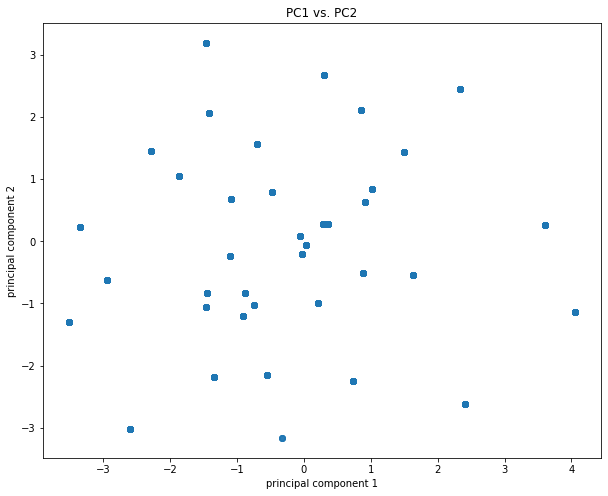

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(full_pca2.PC1.values, full_pca2.PC2.values, alpha=0.1)

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [49]:
#merging the data back together with weather
full = full.drop(COLUMNS,axis=1)
full = full.drop(COLUMNS2,axis=1)

In [50]:
full_2 = pd.concat([full, full_pca[['PC1','PC2']]],axis=1)

In [51]:
full_3 = pd.concat([full_2, full_pca2[['PC1','PC2']]],axis=1)

In [52]:
full_3.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,2007,5,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,4.283993,2.128263,-0.331821,-3.157468
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,2007,5,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,4.283993,2.128263,-0.331821,-3.157468


In [53]:
train2 = full_3.loc[full['Year'].isin([2007,2009,2011,2013])]
test2 = full_3.loc[full['Year'].isin([2008,2010,2012,2014])]

In [54]:
print(train2.shape)
print(test2.shape)

(10506, 35)
(116293, 35)


In [55]:
train2.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,2007,5,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,4.283993,2.128263,-0.331821,-3.157468
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,2007,5,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,4.283993,2.128263,-0.331821,-3.157468


<function matplotlib.pyplot.legend(*args, **kwargs)>

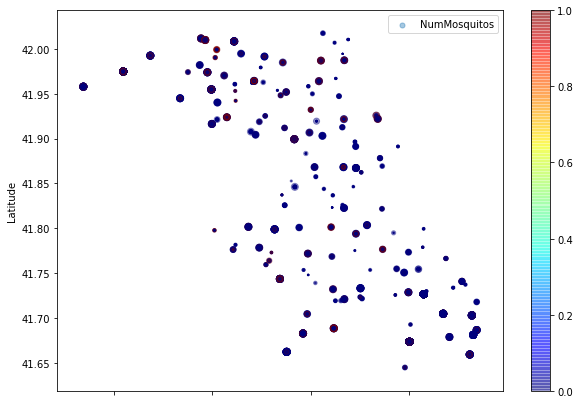

In [56]:
train2.plot(kind='scatter', x= 'Longitude', y='Latitude', alpha=0.4,
             s=train2['NumMosquitos'], label='NumMosquitos', figsize=(10,7),
            c =train2['WnvPresent'], cmap = plt.get_cmap("jet"),colorbar=True)
plt.legend

#Size of circle = Number of Mosquitos
#Colour['Red'] = WNV Present

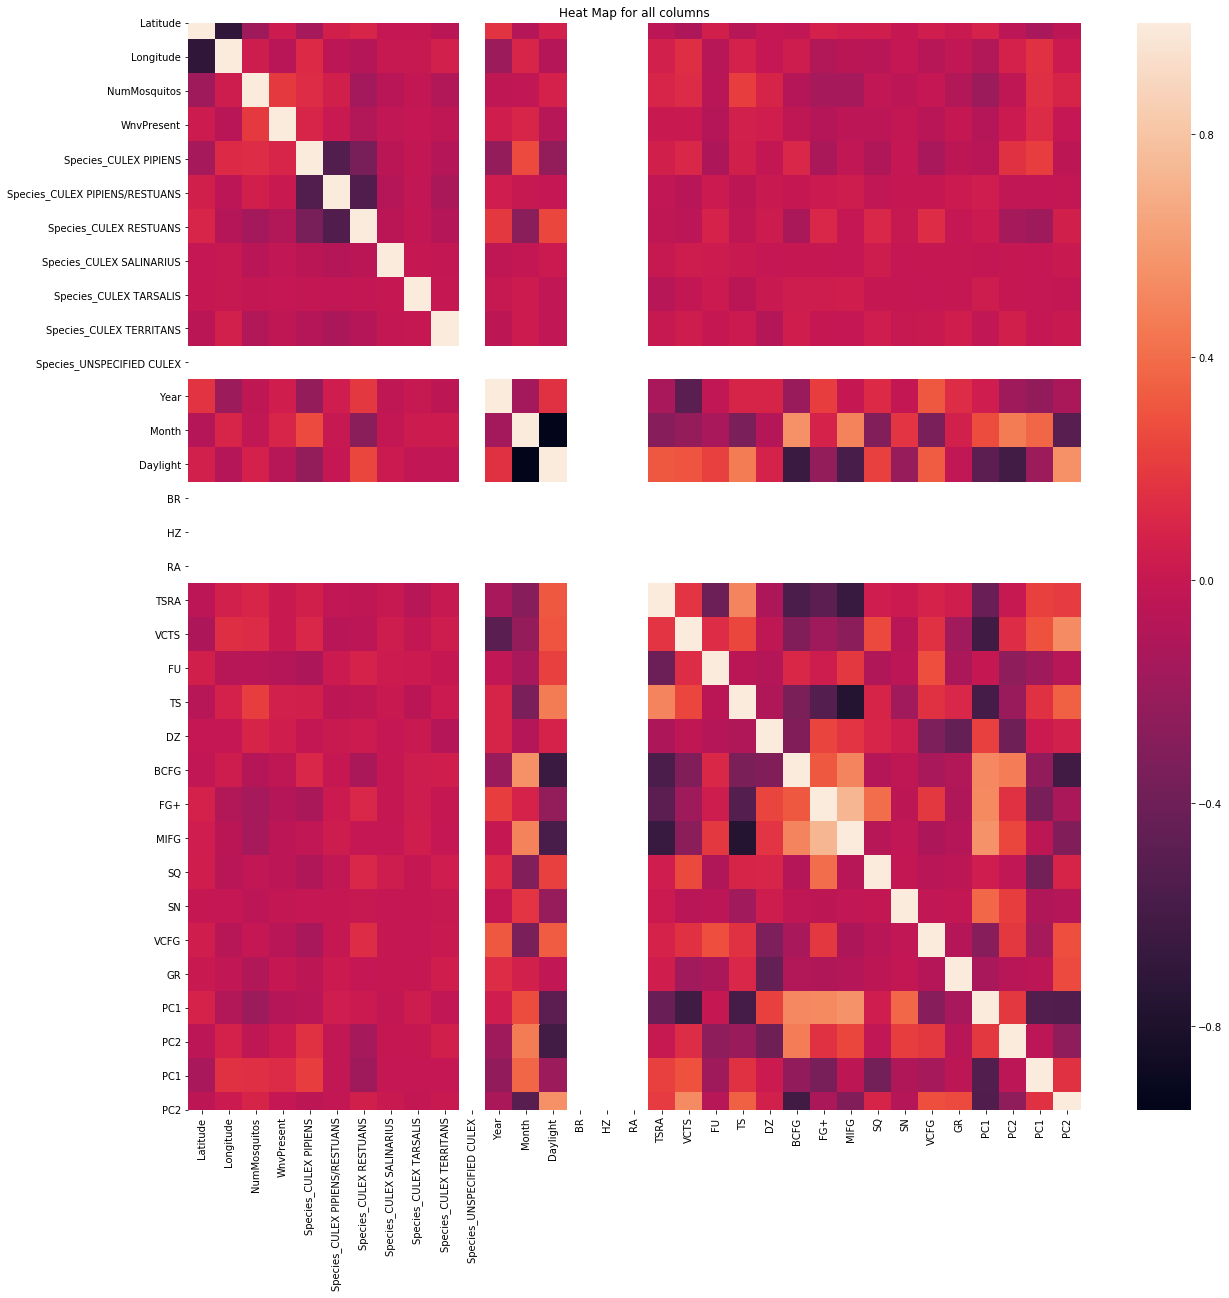

In [57]:
#to find out the general correlation between variables first
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(train2.corr(), ax = ax, annot=False, annot_kws={"size": 20})
#Again some correlation between the Long and Latitudes
#Some correlations between the species

In [58]:
corr_matrix = train2.corr()
corr_matrix['WnvPresent'].sort_values(ascending = False)

WnvPresent                        1.000000
NumMosquitos                      0.196820
PC1                               0.130536
Month                             0.100143
Species_CULEX PIPIENS             0.096206
TS                                0.066969
Year                              0.050865
DZ                                0.050702
Latitude                          0.028697
PC2                               0.018201
VCTS                              0.013507
TSRA                              0.012223
Species_CULEX PIPIENS/RESTUANS    0.010960
GR                               -0.003747
Species_CULEX TARSALIS           -0.005624
PC2                              -0.009397
SN                               -0.018563
Species_CULEX SALINARIUS         -0.021373
BCFG                             -0.033916
Species_CULEX TERRITANS          -0.034566
MIFG                             -0.043869
SQ                               -0.045637
Longitude                        -0.060345
VCFG       

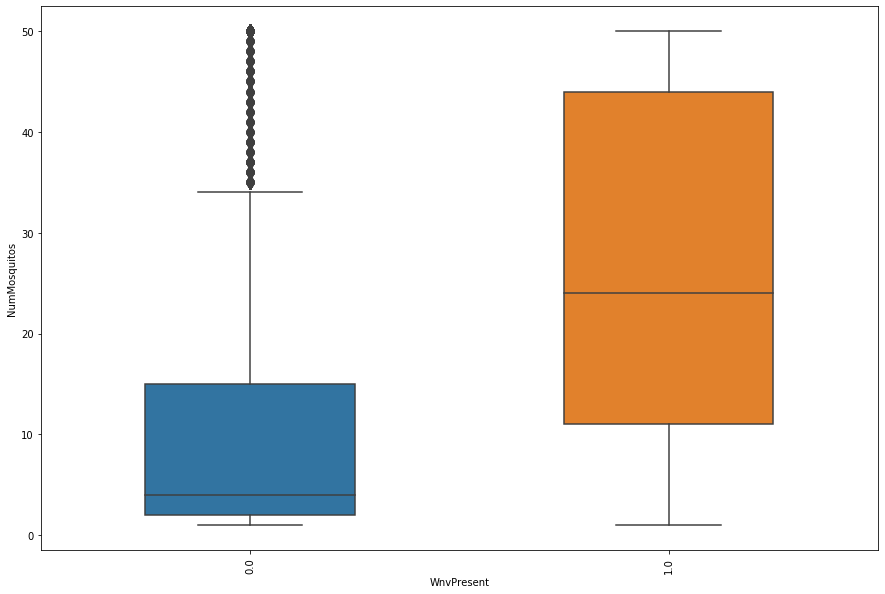

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
ax = sns.boxplot(y=train2.NumMosquitos, x=train2.WnvPresent, orient = 'v', width = 0.5, fliersize = 10).set(
    xlabel='WnvPresent', 
    ylabel='NumMosquitos')

#In general

In [60]:
corr_matrix['NumMosquitos'].sort_values(ascending = False)

NumMosquitos                      1.000000
TS                                0.210081
WnvPresent                        0.196820
PC1                               0.153905
Species_CULEX PIPIENS             0.134754
VCTS                              0.131389
TSRA                              0.096294
PC2                               0.091041
DZ                                0.087128
Daylight                          0.073968
Species_CULEX PIPIENS/RESTUANS    0.061499
Longitude                         0.036633
VCFG                             -0.013123
Species_CULEX TARSALIS           -0.017317
Month                            -0.026040
SQ                               -0.026768
Year                             -0.029611
PC2                              -0.033948
SN                               -0.046911
FU                               -0.061547
Species_CULEX SALINARIUS         -0.062886
BCFG                             -0.088076
GR                               -0.093983
Species_CUL

In [61]:
corr_matrix['Daylight'].sort_values(ascending = False)

Daylight                          1.000000
PC2                               0.556123
TS                                0.463703
VCFG                              0.336536
TSRA                              0.321878
VCTS                              0.304621
Species_CULEX RESTUANS            0.249205
FU                                0.224042
SQ                                0.223944
Year                              0.158609
DZ                                0.078726
NumMosquitos                      0.073968
Latitude                          0.063148
Species_CULEX SALINARIUS          0.019430
Species_CULEX PIPIENS/RESTUANS   -0.009934
GR                               -0.021091
Species_CULEX TERRITANS          -0.024264
Species_CULEX TARSALIS           -0.027924
WnvPresent                       -0.073487
Longitude                        -0.075828
PC1                              -0.195376
SN                               -0.215212
FG+                              -0.232661
Species_CUL

In [62]:
train2.columns

Index(['Date', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS',
       'Species_UNSPECIFIED CULEX', 'Year', 'Month', 'Daylight', 'BR', 'HZ',
       'RA', 'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG', 'FG+', 'MIFG', 'SQ',
       'SN', 'VCFG', 'GR', 'PC1', 'PC2', 'PC1', 'PC2'],
      dtype='object')

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [64]:
train2.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,2007,5,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,4.283993,2.128263,-0.331821,-3.157468
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,2007,5,872.806452,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,4.283993,2.128263,-0.331821,-3.157468


In [65]:
columns = ['Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS',
       'Species_UNSPECIFIED CULEX']

for i in columns:
    train2[i] = train2[i].astype(int).astype(float)

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Selecting columns to include to X

In [66]:
X = pd.concat([train2.iloc[:,2:4],train2.iloc[:,6:13],train2.iloc[:,15:35]],axis = 1)
ss = StandardScaler()
Xs = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
y = train2.WnvPresent

In [67]:
#Train,test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, random_state=42 , train_size=0.7 , test_size=0.3,stratify=y)

In [68]:
model = []
parameters = []
scores = []
precision = []
recall = []
ra_score = []

# To put the name of model, models from sklearn, and hyperparameters of the model we want to search through in order

names = ['Decision Tree', 'RandomForest', 'LogReg','KNN','SVC','AdaBoost', 'BaggingClass', 'GradientBoost']

estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

params = [
    {'clf__max_depth': [None, 10, 15, 20, 30, 35],
    'clf__min_samples_split': [5,10,15,20,25,30]}, #DecisionTree

    {'clf__max_depth': [None,50,75,100,150,200],
     'clf__min_samples_split': [5,10,15,20,30]}, #RandomForest
    
    {'clf__C':[1,3,5,10],
     'clf__solver':['lbfgs', 'liblinear', 'sag', 'saga'],
     'clf__max_iter':[50,100,125,150,175,200]}, #LogisticRegression
    
    {'clf__n_neighbors':[3,5,10,15,20,25],
     'clf__weights':['uniform','distance'],
     'clf__p':[1,2,3]}, #KNeighborsClassifier
    
    {'clf__kernel':['rbf']}, #SVC - 'something wrong with 'sigmoid','poly','linear'
    
    {'clf__n_estimators':[25,40,50,100,200,500]}, #AdaBoost
    
    {'clf__n_estimators':[10,30,50,100],
     'clf__max_samples':[1,5,10],
     'clf__max_features':[1,5,10]}, #BaggingClassifier
    
    {'clf__loss' : ['deviance', 'exponential'],
     'clf__n_estimators':[50,75,100,200,500],
     'clf__max_features': [None, 'auto','sqrt','log2']} #GradientBoosting
]

for name, estimator, param in zip(names, estimators, params):
    clf_pipe = Pipeline([
        # not sure if we need to scale the X
        # removed ('ss', StandardScaler),
        ('clf', estimator)
    ])
#     cv = StratifiedKFold(shuffle=True, n_splits=3)
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    gs = GridSearchCV(clf_pipe, param_grid=param, cv=cv, verbose=10, n_jobs=-1)
    gs.fit(X_train, y_train)
    
    print(name)
    print('Best Score: {}'.format(gs.best_score_))
    print('Best Params: {}'.format(gs.best_params_))
    
    # Best Model
    grid_model = gs.best_estimator_
    
    print('Model Score on X_train: {}'.format(grid_model.score(X_train, y_train)))
    
    # Prediction and score
    pred = grid_model.predict(X_test)
    print('Accuracy score of prediction: {}'.format(accuracy_score(y_test, pred)))
    
    
    # Confusion Matrix 
    conf_matrix = confusion_matrix(y_test, pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print('TN: {}, FP:{}, FN:{}, TP:{}'.format(tn,fp,fn,tp))
    print('Precision of the model is {}'. format(tp/(tp+fp)))
    print('Recall of the model is {}'.format(tp/(tp+fn)))
    
    #roc_auc
    ra = roc_auc_score(y_test, pred)
    print ('ROC_AUC: {}'.format(ra))
   
    
    print('\n')
    model.append(name)
    parameters.append(gs.best_params_)
    scores.append(accuracy_score(y_test, pred))
    recall.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    ra_score.append(ra) 
    
results = pd.DataFrame({'model': model, 
              'parameters': parameters, 
              'scores': scores, 
              'recall': recall, 
              'precision': precision,
              'roc_auc':ra_score
                       })
results

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1920s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1236s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done  71 out of 108 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.8s finished


Decision Tree
Best Score: 0.9438024019941084
Best Params: {'clf__max_depth': 10, 'clf__min_samples_split': 30}
Model Score on X_train: 0.9480554800108785
Accuracy score of prediction: 0.9473350253807107
TN: 2977, FP:10, FN:156, TP:9
Precision of the model is 0.47368421052631576
Recall of the model is 0.05454545454545454
ROC_AUC: 0.5255988069513345


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1280s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished
E:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid

RandomForest
Best Score: 0.9472014502605937
Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 30}
Model Score on X_train: 0.9476475387544193
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   12.7s
[Paralle

LogReg
Best Score: 0.947654656696125
Best Params: {'clf__C': 1, 'clf__max_iter': 50, 'clf__solver': 'lbfgs'}
Model Score on X_train: 0.9475115583355996
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5


Fitting 3 folds for each of 36 candidates, totalling 108 fits


E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in longlong_scalars
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 104 out of 108 | elapsed:   44.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   46.0s finished


KNN
Best Score: 0.9478812599138908
Best Params: {'clf__n_neighbors': 25, 'clf__p': 3, 'clf__weights': 'uniform'}
Model Score on X_train: 0.9475115583355996
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5


Fitting 3 folds for each of 1 candidates, totalling 3 fits


E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in longlong_scalars
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
Best Score: 0.947654656696125
Best Params: {'clf__kernel': 'rbf'}
Model Score on X_train: 0.9475115583355996
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0


E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in longlong_scalars
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ROC_AUC: 0.5


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    1.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    2.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    4.7s finished


AdaBoost
Best Score: 0.947654656696125
Best Params: {'clf__n_estimators': 25}
Model Score on X_train: 0.9475115583355996
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5


Fitting 3 folds for each of 36 candidates, totalling 108 fits


E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in longlong_scalars
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0400s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of 108 | elapsed:    0.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.1s finished
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in longlong_scalars
[Parallel(n_jobs=-1)]: Using back

BaggingClass
Best Score: 0.947654656696125
Best Params: {'clf__max_features': 1, 'clf__max_samples': 1, 'clf__n_estimators': 10}
Model Score on X_train: 0.9475115583355996
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   22.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.3s finished


GradientBoost
Best Score: 0.947654656696125
Best Params: {'clf__loss': 'deviance', 'clf__max_features': 'sqrt', 'clf__n_estimators': 50}
Model Score on X_train: 0.9475115583355996
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5




E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in longlong_scalars


,model,parameters,scores,recall,precision,roc_auc
0,Decision Tree,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.947335,0.054545,0.473684,0.525599
1,RandomForest,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.947652,0.000000,NaN,0.500000
2,LogReg,"{'clf__C': 1, 'clf__max_iter': 50, 'clf__solve...",0.947652,0.000000,NaN,0.500000
3,KNN,"{'clf__n_neighbors': 25, 'clf__p': 3, 'clf__we...",0.947652,0.000000,NaN,0.500000
4,SVC,{'clf__kernel': 'rbf'},0.947652,0.000000,NaN,0.500000
5,AdaBoost,{'clf__n_estimators': 25},0.947652,0.000000,NaN,0.500000
6,BaggingClass,"{'clf__max_features': 1, 'clf__max_samples': 1...",0.947652,0.000000,NaN,0.500000
7,GradientBoost,"{'clf__loss': 'deviance', 'clf__max_features':...",0.947652,0.000000,NaN,0.500000


### The following section is added to check the predict_proba scores

#### P/S: wasn't able to add this into the loop, so it was done manually instead

In [69]:
estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

In [70]:
model = DecisionTreeClassifier(max_depth = 10 , min_samples_split=25)
DTC = model.fit(X_train, y_train)
pred = DTC.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.7415761227947368

In [71]:
model = RandomForestClassifier(max_depth = 100 , min_samples_split=30)
RF = model.fit(X_train, y_train)
pred = RF.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

E:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7752168487689077

In [72]:
model = LogisticRegression(C=3, max_iter=175 , solver='lbfgs')
LogReg = model.fit(X_train, y_train)
pred = LogReg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8082914853252985

In [73]:
model = KNeighborsClassifier(n_neighbors=25, p=2, weights='uniform')
Knn = model.fit(X_train, y_train)
pred = Knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.7784774426555479

In [74]:
model = SVC(kernel='rbf', probability=True)
svc = model.fit(X_train, y_train)
pred = svc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6335707256698218

In [75]:
model = AdaBoostClassifier(n_estimators=25)
Ada = model.fit(X_train, y_train)
pred = Ada.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.7971776688884156

In [76]:
model = GradientBoostingClassifier(loss='exponential', max_features='log2', n_estimators=200)
GB = model.fit(X_train, y_train)
pred = GB.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8110600480871656

### Use this as our final model

In [92]:
#use this final model
model = LogisticRegression(C=3, max_iter=175 , solver='lbfgs')
LogReg = model.fit(X_train, y_train)
pred = LogReg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8082914853252985

In [93]:
model.coef_

array([[-0.09593698, -0.4992351 ,  0.54194272,  0.47549185,  0.03796906,
        -0.38089855, -0.10296069, -0.62031242,  0.        , -1.28514949,
         0.        ,  0.        ,  0.        , -0.75507104, -0.29022546,
        -0.12475417,  0.20987287,  1.10636603,  0.18296757, -0.29190837,
        -0.43947879, -0.3115513 , -0.14592348,  0.57861606,  0.52453636,
        -1.43321959, -0.01603612,  0.61019455, -0.54261485]])

In [94]:
X_train.tail()

,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
2721,-1.487822,1.036643,1.700751,-0.908769,-0.593987,-0.090848,-0.023905,-0.146925,0.0,-0.095051,0.0,0.0,0.0,0.232775,1.315659,-0.560274,0.465031,0.501011,-0.412071,-0.482803,-0.353837,-0.193984,-0.078902,-0.337793,-0.221892,-0.938750,0.106502,1.186025,1.048050
1009,0.239521,0.037706,1.700751,-0.908769,-0.593987,-0.090848,-0.023905,-0.146925,0.0,-0.095051,0.0,0.0,0.0,0.232775,1.315659,-0.560274,0.465031,0.501011,-0.412071,-0.482803,-0.353837,-0.193984,-0.078902,-0.337793,-0.221892,-0.938750,0.106502,1.186025,1.048050
999,0.709956,-0.987177,1.700751,-0.908769,-0.593987,-0.090848,-0.023905,-0.146925,0.0,-0.095051,0.0,0.0,0.0,0.232775,1.315659,-0.560274,0.465031,0.501011,-0.412071,-0.482803,-0.353837,-0.193984,-0.078902,-0.337793,-0.221892,-0.938750,0.106502,1.186025,1.048050
4894,1.007225,-1.047388,1.700751,-0.908769,-0.593987,-0.090848,-0.023905,-0.146925,0.0,0.888529,0.0,0.0,0.0,0.232775,-0.760075,1.784841,0.465031,0.501011,-0.412071,-0.482803,-0.353837,-0.193984,-0.078902,-0.337793,-0.221892,0.460468,-2.005389,-0.421265,-0.346398
6831,0.626992,-0.277993,-0.587976,-0.908769,1.683540,-0.090848,-0.023905,-0.146925,0.0,0.888529,0.0,0.0,0.0,0.232775,1.315659,1.784841,0.465031,-1.995964,-0.412071,-0.482803,-0.353837,-0.193984,-0.078902,2.960395,-0.221892,-1.733199,1.127181,0.194387,0.847331


### Preprocessing the same way for the test set

In [78]:
test2.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
10506,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,1,0,0,0,0,0,2008,6,910.333333,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0.373319,-0.079973,-3.356098,0.221832
10507,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,1,0,0,0,0,2008,6,910.333333,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0.373319,-0.079973,-3.356098,0.221832


In [79]:
test2.iloc[:,6:20].head(1)

,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,BR,HZ,RA,TSRA
10506,0,1,0,0,0,0,0,2008,6,910.333333,1,1,1,1


In [80]:
X.shape

(10506, 29)

In [81]:
X = pd.concat([test2.iloc[:,2:4],test2.iloc[:,6:13],test2.iloc[:,15:35]],axis = 1)
Xs = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [82]:
final_pred = model.predict_proba(Xs)[:,1]

In [83]:
final_pred.shape

(116293,)

### From the final prediction, combine to create a new database for submission

In [84]:
sample = pd.read_csv('../assets/samplesubmission.csv')
sub = pd.DataFrame()
sub['Id']=sample['Id']
sub['WnvPresent'] = final_pred
print(sub.shape)
sub.head()

(116293, 2)


,Id,WnvPresent
0,1,0.003458
1,2,0.000954
2,3,0.004370
3,4,0.000268
4,5,0.000129


In [85]:
sub.to_csv('submission/sub5.csv',index=False)

### To visualise the location with the probability of virus happnening

In [86]:
test2.head()

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Year,Month,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
10506,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,1,0,0,0,0,0,2008,6,910.333333,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0.373319,-0.079973,-3.356098,0.221832
10507,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,1,0,0,0,0,2008,6,910.333333,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0.373319,-0.079973,-3.356098,0.221832
10508,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,1,0,0,0,0,0,0,2008,6,910.333333,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0.373319,-0.079973,-3.356098,0.221832
10509,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,0,1,0,0,0,2008,6,910.333333,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0.373319,-0.079973,-3.356098,0.221832
10510,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,0,0,0,1,0,2008,6,910.333333,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0.373319,-0.079973,-3.356098,0.221832


In [87]:
sub['Latitude']=test['Latitude']
sub['Longitude']=test['Longitude']

In [88]:
sub.WnvPresent.sort_values(ascending = False)

113605    0.955505
114823    0.955505
112385    0.955505
111163    0.955505
114821    0.944373
113603    0.944373
112383    0.944373
111161    0.944373
111149    0.942776
111150    0.942776
113593    0.942776
111151    0.942776
111148    0.942776
111152    0.942776
112374    0.942776
111154    0.942776
112377    0.942776
112376    0.942776
112373    0.942776
113597    0.942776
111147    0.942776
111153    0.942776
113596    0.942776
114815    0.942776
113595    0.942776
114814    0.942776
114813    0.942776
113591    0.942776
113592    0.942776
113594    0.942776
            ...   
996       0.000035
3421      0.000035
2204      0.000035
868       0.000035
3288      0.000035
2076      0.000035
924       0.000033
2132      0.000033
3344      0.000033
980       0.000033
2188      0.000033
3405      0.000033
2012      0.000032
804       0.000032
3224      0.000032
812       0.000032
3232      0.000032
2020      0.000032
2004      0.000032
3216      0.000032
796       0.000032
3312      0.

<function matplotlib.pyplot.legend(*args, **kwargs)>

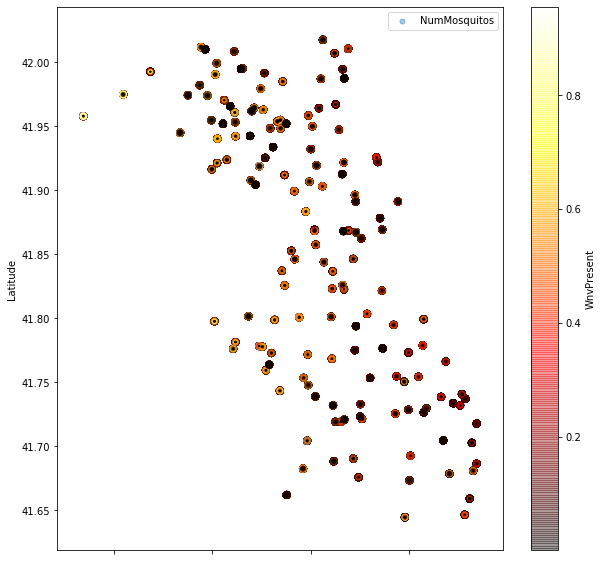

In [89]:
sub.plot(kind='scatter', x= 'Longitude', y='Latitude', alpha=0.4,
             s=train['NumMosquitos'], label='NumMosquitos', figsize=(10,10),
            c ='WnvPresent', cmap = plt.get_cmap("hot"),colorbar=True)
plt.legend

#Size of circle = Number of Mosquitos
#Colour['Red'] = WNV Present

In [90]:
sub[['Longitude', 'Latitude']][sub.WnvPresent>0.8].drop_duplicates().shape

(115, 2)

In [91]:
mapdata = np.loadtxt("../predict-west-nile-virus/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


locations = sub[['Longitude', 'Latitude','WnvPresent']].drop_duplicates().values
l2 = sub[['Longitude', 'Latitude','WnvPresent']][sub.WnvPresent>0.8].drop_duplicates().values

plt.scatter(l2[:,0], l2[:,1], marker='*',
           c = l2[:,2], cmap = plt.get_cmap("Reds"))
plt.scatter(locations[:,0], locations[:,1], marker='o',
           c = locations[:,2], cmap = plt.get_cmap("winter"))


plt.savefig('heatmap.png')

OSError: ../predict-west-nile-virus/mapdata_copyright_openstreetmap_contributors.txt not found.

In [ ]:
#Export this file to do cost analysis
sub.to_csv('submission/sub_cba.csv',index=False)